# LLM Reasoning Framework Comparison Project

## 🎯 Project Overview

This project compares three popular reasoning frameworks for Large Language Models (LLMs) across different task types:

### **Reasoning Frameworks**
1. **ReAct** (Reasoning + Acting) - Interleaves reasoning and action steps
2. **Chain-of-Thought (CoT)** - Sequential step-by-step reasoning
3. **Tree-of-Thoughts (ToT)** - Explores multiple reasoning paths in parallel

### **Task Types & Examples**
1. **Code Generation** - Conway's Game of Life implementation
2. **Itinerary Planning** - 7-day European tour (London → Paris → Amsterdam → Berlin)
3. **Procedure Structuring** - Software deployment process

### **Evaluation Methodology**
- **3 runs per framework per task** = 27 total experiments
- **Reference-based scoring** using gold standard "best" outputs
- **Discriminative validation** with 70+ point threshold for passing
- **Multi-dimensional scoring** across structure, completeness, and sophistication

### **Key Metrics**
- ✅ **Validation Score** (0-100) - Quality against reference standards
- ⏱️ **Execution Time** - Framework processing speed
- 🔤 **Token Usage** - LLM resource consumption
- 🧠 **Reasoning Steps** - Complexity of thought process
- 📊 **Success Rate** - Percentage of valid outputs

## Setup and Configuration

## 📊 Data Analysis Setup

### Quick Start Guide
1. **Run Experiments**: `python run_experiment.py --quick --no-limit`
2. **Load Results**: Execute the cells below to analyze data
3. **Generate Visualizations**: Interactive charts and comparisons

### Data Files Used
- `results/experiment_results.json` - Complete raw data
- `results/experiment_summary.csv` - Tabular summary for analysis
- `results/llm_responses.txt` - Human-readable LLM outputs

*This notebook focuses purely on data visualization and interactive analysis.*

In [1]:
# Run Experiments (if needed)
# Uncomment and run this cell if you haven't run experiments yet

# import subprocess
# import os

# print("🚀 Running LLM Framework Experiments...")
# print("⏳ This will take approximately 5-10 minutes...")
# print("=" * 50)

# try:
#     result = subprocess.run([
#         'python', 'run_experiment.py', '--quick', '--no-limit'
#     ], capture_output=True, text=True, cwd=os.getcwd())
#     
#     if result.returncode == 0:
#         print("✅ Experiments completed successfully!")
#         print(result.stdout)
#     else:
#         print("❌ Error running experiments:")
#         print(result.stderr)
# except Exception as e:
#     print(f"❌ Failed to run experiments: {e}")
#     print("💡 Run manually: python run_experiment.py --quick --no-limit")

print("💡 To run experiments manually, use:")
print("   python run_experiment.py --quick --no-limit")
print("\n📁 Expected output files:")
print("   • results/experiment_summary.csv")
print("   • results/experiment_results.json") 
print("   • results/llm_responses.txt")

💡 To run experiments manually, use:
   python run_experiment.py --quick --no-limit

📁 Expected output files:
   • results/experiment_summary.csv
   • results/experiment_results.json
   • results/llm_responses.txt


In [2]:
# Essential imports
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from pathlib import Path
from dotenv import load_dotenv
import warnings
import re
from typing import Dict, List

# Project imports
import sys
sys.path.append('.')
from agents import AgentFactory
from tasks import TaskGenerator, TaskValidator
from utils import LLMManager, ExperimentResult

# Suppress warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Initialize variables to avoid NameError
df = None
raw_data = None

load_dotenv()

print("✅ Environment loaded")
print("📦 All libraries imported successfully!")
print("📁 Ready to analyze LLM reasoning framework data")

✅ Environment loaded
📦 All libraries imported successfully!
📁 Ready to analyze LLM reasoning framework data


In [3]:
# Color Configuration for Framework Visualizations
# Custom color scheme for consistent framework representation
FRAMEWORK_COLORS = {
    'react': '#edae49',    # Yellow/Gold
    'cot': '#d1495b',      # Red/Pink  
    'tot': '#00798c'       # Teal/Blue-green
}

# Create color lists for different plot types
def get_framework_colors(frameworks):
    """Get colors for a list of frameworks in order."""
    return [FRAMEWORK_COLORS.get(fw, '#888888') for fw in frameworks]

def get_color_discrete_map(frameworks):
    """Get color mapping for plotly discrete color mapping."""
    return {fw: FRAMEWORK_COLORS.get(fw, '#888888') for fw in frameworks}

# Set matplotlib color cycle to match our scheme
framework_order = ['react', 'cot', 'tot']  # Standard order
color_sequence = [FRAMEWORK_COLORS[fw] for fw in framework_order]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_sequence)

print("🎨 CUSTOM COLOR SCHEME CONFIGURED")
print("=" * 35)
for fw, color in FRAMEWORK_COLORS.items():
    print(f"   {fw.upper()}: {color}")
print(f"\n✅ Colors applied to all visualizations!")

🎨 CUSTOM COLOR SCHEME CONFIGURED
   REACT: #edae49
   COT: #d1495b
   TOT: #00798c

✅ Colors applied to all visualizations!


In [4]:
import os
import pandas as pd
import json
from pathlib import Path

# Check API configuration
api_status = {
    'Google': '✅' if os.getenv('GOOGLE_API_KEY') and not os.getenv('GOOGLE_API_KEY').startswith('your_') else '❌'
}

print("API Configuration:")
for provider, status in api_status.items():
    print(f"  {provider}: {status}")

# Configuration
MODEL = os.getenv('DEFAULT_MODEL')
DEMO_MODE = True  # Set to False for real API calls

print(f"\nModel: {MODEL}")
print(f"Demo Mode: {'ON' if DEMO_MODE else 'OFF'}")

# Load Experiment Data

# Check if results exist
results_dir = Path("results")
csv_file = results_dir / "experiment_summary.csv"
json_file = results_dir / "experiment_results.json"

print("🔍 LOADING EXPERIMENT DATA")
print("=" * 30)

if csv_file.exists():
    # Load CSV data for analysis
    df = pd.read_csv(csv_file)
    print(f"✅ Loaded {len(df)} experiment records from CSV")
    
    # Load JSON for detailed analysis
    if json_file.exists():
        with open(json_file, 'r') as f:
            raw_data = json.load(f)
        print(f"✅ Loaded detailed JSON data with {len(raw_data)} records")
    else:
        raw_data = None
        print("⚠️ JSON file not found - limited analysis available")
    
    # Data overview
    print(f"\n📊 Dataset Overview:")
    print(f"   • Frameworks: {', '.join(df['framework'].unique())}")
    print(f"   • Task Types: {', '.join(df['task_type'].unique())}")
    print(f"   • Task IDs: {', '.join(df['task_id'].unique())}")
    print(f"   • Total Runs: {len(df)}")
    print(f"   • Success Rate: {df['validation_passed'].mean():.1%}")
    print(f"   • Avg Score: {df['validation_score'].mean():.1f}/100")
    
    # Display first few rows
    print(f"\n📋 Sample Data:")
    display(df.head())
    
else:
    print("❌ No experiment results found!")
    print("🚀 Run experiments first: python run_experiment.py --quick --no-limit")
    print("\n📁 Expected files:")
    print("   • results/experiment_summary.csv")
    print("   • results/experiment_results.json") 
    print("   • results/llm_responses.txt")
    df = None
    raw_data = None

API Configuration:
  Google: ✅

Model: gemini-2.0-flash-lite
Demo Mode: ON
🔍 LOADING EXPERIMENT DATA
✅ Loaded 27 experiment records from CSV
✅ Loaded detailed JSON data with 27 records

📊 Dataset Overview:
   • Frameworks: react, cot, tot
   • Task Types: code_generation, itinerary_planning, procedure_structuring
   • Task IDs: code_001, itin_001, proc_001
   • Total Runs: 27
   • Success Rate: 92.6%
   • Avg Score: 82.4/100

📋 Sample Data:


,timestamp,framework,task_id,task_type,run_number,success,tokens_used,execution_time,memory_usage,reasoning_steps,final_answer,validation_score,validation_passed,error_message
0,2025-06-26T15:43:30.053845,react,code_001,code_generation,1,True,2987,16.373588,2.152344,6,"```python\nclass Grid:\n def __init__(self,...",90.0,True,NaN
1,2025-06-26T15:43:54.081603,react,code_001,code_generation,2,True,1952,10.370221,0.023438,3,"```python\nclass Grid:\n def __init__(self,...",80.0,True,NaN
2,2025-06-26T15:44:14.466401,react,code_001,code_generation,3,True,2159,9.101258,0.160156,4,```python\nimport time\n\nclass Grid:\n def...,90.0,True,NaN
3,2025-06-26T15:45:23.043995,cot,code_001,code_generation,1,True,2065,9.696908,0.164062,6,"```python\nclass Grid:\n def __init__(self,...",90.0,True,NaN
4,2025-06-26T15:45:43.302770,cot,code_001,code_generation,2,True,2468,10.435209,0.089844,7,"```python\nclass Grid:\n def __init__(self,...",90.0,True,NaN


## Task Definitions

Three carefully selected tasks representing different cognitive demands:

## 📈 Statistical Analysis & Performance Metrics

Comprehensive analysis of framework performance across all dimensions.

In [5]:
# Statistical Summary by Framework
if df is not None:
    print("🔍 PERFORMANCE ANALYSIS BY FRAMEWORK")
    print("=" * 60)
    
    # Group by framework for summary statistics
    framework_stats = df.groupby('framework').agg({
        'validation_score': ['mean', 'std', 'min', 'max'],
        'validation_passed': ['sum', 'count', 'mean'],
        'execution_time': ['mean', 'std'],
        'tokens_used': ['mean', 'std'],
        'reasoning_steps': ['mean', 'std']
    }).round(2)
    
    framework_stats.columns = ['_'.join(col).strip() for col in framework_stats.columns]
    
    # Display framework comparison
    for framework in df['framework'].unique():
        subset = df[df['framework'] == framework]
        print(f"\n🧠 {framework.upper()} Framework:")
        print(f"   Validation Score: {subset['validation_score'].mean():.1f} ± {subset['validation_score'].std():.1f}")
        print(f"   Success Rate: {subset['validation_passed'].mean():.1%} ({subset['validation_passed'].sum()}/{len(subset)})")
        print(f"   Avg Execution Time: {subset['execution_time'].mean():.2f}s")
        print(f"   Avg Tokens Used: {subset['tokens_used'].mean():.0f}")
        print(f"   Avg Reasoning Steps: {subset['reasoning_steps'].mean():.1f}")
    
    # Task type analysis
    print(f"\n📋 PERFORMANCE BY TASK TYPE")
    print("=" * 40)
    
    for task_type in df['task_type'].unique():
        subset = df[df['task_type'] == task_type]
        print(f"\n📝 {task_type.replace('_', ' ').title()}:")
        print(f"   Best Framework: {subset.loc[subset['validation_score'].idxmax(), 'framework']}")
        print(f"   Highest Score: {subset['validation_score'].max():.1f}")
        print(f"   Success Rate: {subset['validation_passed'].mean():.1%}")
        
        # Framework ranking for this task
        task_ranking = subset.groupby('framework')['validation_score'].mean().sort_values(ascending=False)
        print(f"   Framework Ranking: {' > '.join([f'{fw}({score:.1f})' for fw, score in task_ranking.items()])}")
        
else:
    print("❌ No data available for analysis")
    print("💡 Please run the data loading cell above first!")
    print("🚀 Or run experiments: python run_experiment.py --quick --no-limit")

🔍 PERFORMANCE ANALYSIS BY FRAMEWORK

🧠 REACT Framework:
   Validation Score: 70.4 ± 38.3
   Success Rate: 77.8% (7/9)
   Avg Execution Time: 10.90s
   Avg Tokens Used: 2039
   Avg Reasoning Steps: 6.4

🧠 COT Framework:
   Validation Score: 88.7 ± 4.4
   Success Rate: 100.0% (9/9)
   Avg Execution Time: 16.19s
   Avg Tokens Used: 2946
   Avg Reasoning Steps: 2.9

🧠 TOT Framework:
   Validation Score: 88.2 ± 5.0
   Success Rate: 100.0% (9/9)
   Avg Execution Time: 10.64s
   Avg Tokens Used: 2172
   Avg Reasoning Steps: 15.3

📋 PERFORMANCE BY TASK TYPE

📝 Code Generation:
   Best Framework: tot
   Highest Score: 95.0
   Success Rate: 100.0%
   Framework Ranking: tot(91.7) > cot(90.0) > react(86.7)

📝 Itinerary Planning:
   Best Framework: react
   Highest Score: 93.0
   Success Rate: 100.0%
   Framework Ranking: cot(93.0) > react(93.0) > tot(88.7)

📝 Procedure Structuring:
   Best Framework: tot
   Highest Score: 90.0
   Success Rate: 77.8%
   Framework Ranking: tot(84.3) > cot(83.0) > re

## 📊 Interactive Data Visualizations

Comprehensive visual analysis of framework performance and comparisons.

## Reasoning Frameworks

**ReAct:** Combines reasoning and action in iterative cycles  
**Chain-of-Thought:** Sequential step-by-step logical reasoning  
**Tree-of-Thoughts:** Explores multiple reasoning branches

In [6]:
# Initialize frameworks
frameworks = AgentFactory.get_available_frameworks()
llm_manager = LLMManager()

print("🧠 REASONING FRAMEWORKS")
print("=" * 50)
for framework in frameworks:
    print(f"✅ {framework.upper()}")

print(f"\n🎯 Experiment Design: {len(frameworks)} frameworks × 1 task per type × 3 runs = {len(frameworks) * 3 * 3} total experiments")

# 1. Validation Score Comparison Across Frameworks
if df is not None:
    # Create subplot layout
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=['Score Distribution by Framework', 'Score by Task Type', 
                       'Success Rate Comparison', 'Score vs Execution Time'],
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # 1. Box plot of scores by framework
    for i, framework in enumerate(df['framework'].unique()):
        subset = df[df['framework'] == framework]
        fig.add_trace(
            go.Box(y=subset['validation_score'], name=framework, 
                   boxpoints='all', jitter=0.3, pointpos=-1.8,
                   marker_color=FRAMEWORK_COLORS.get(framework, '#888888')),
            row=1, col=1
        )
    
    # 2. Score by task type heatmap data
    score_matrix = df.pivot_table(values='validation_score', 
                                  index='framework', 
                                  columns='task_type', 
                                  aggfunc='mean')
    
    fig.add_trace(
        go.Heatmap(z=score_matrix.values, 
                   x=score_matrix.columns, 
                   y=score_matrix.index,
                   colorscale='RdYlGn',
                   text=score_matrix.values.round(1),
                   texttemplate="%{text}",
                   textfont={"size": 12}),
        row=1, col=2
    )
    
    # 3. Success rate bar chart with custom colors
    success_rates = df.groupby('framework')['validation_passed'].mean() * 100
    fig.add_trace(
        go.Bar(x=success_rates.index, y=success_rates.values, 
               name='Success Rate (%)', 
               marker_color=get_framework_colors(success_rates.index)),
        row=2, col=1
    )
    
    # 4. Score vs Execution Time scatter with custom colors
    fig.add_trace(
        go.Scatter(x=df['execution_time'], y=df['validation_score'],
                   mode='markers', 
                   marker=dict(size=8, 
                              color=[FRAMEWORK_COLORS.get(fw, '#888888') for fw in df['framework']],
                              opacity=0.7),
                   text=df['framework'] + '<br>' + df['task_type'],
                   name='Score vs Time'),
        row=2, col=2
    )
    
    # Update layout
    fig.update_layout(height=800, showlegend=True, 
                      title_text="LLM Reasoning Framework Performance Analysis")
    fig.update_xaxes(title_text="Framework", row=1, col=1)
    fig.update_yaxes(title_text="Validation Score", row=1, col=1)
    fig.update_xaxes(title_text="Task Type", row=1, col=2)
    fig.update_yaxes(title_text="Framework", row=1, col=2)
    fig.update_xaxes(title_text="Framework", row=2, col=1)
    fig.update_yaxes(title_text="Success Rate (%)", row=2, col=1)
    fig.update_xaxes(title_text="Execution Time (s)", row=2, col=2)
    fig.update_yaxes(title_text="Validation Score", row=2, col=2)
    
    fig.show()
    
else:
    print("❌ No data available for visualization")

🧠 REASONING FRAMEWORKS
✅ REACT
✅ COT
✅ TOT

🎯 Experiment Design: 3 frameworks × 1 task per type × 3 runs = 27 total experiments


## Experiment Execution

### 🚀 Performance Metrics Deep Dive

In [7]:
# Construct all_tasks from df
all_tasks = {}
for ttype in df['task_type'].unique():
    all_tasks[ttype] = [
        type('Task', (), {
            'id': row['task_id'],
            'title': f"{row['task_type']} ({row['task_id']})"
        })()
        for _, row in df[df['task_type'] == ttype].iterrows()
    ]

def run_experiment(demo_mode=True, runs_per_task=3):
    """Run the complete experiment."""
    results = []
    
    if demo_mode:
        print("🔸 DEMO MODE: Generating mock results (no API calls)")
        
        # Generate realistic mock data
        for task_type, tasks in all_tasks.items():
            task = tasks[0]
            for framework in frameworks:
                for run in range(runs_per_task):
                    # Realistic mock metrics
                    base_scores = {'react': 80, 'cot': 75, 'tot': 85}
                    base_times = {'react': 2.5, 'cot': 1.8, 'tot': 3.2}
                    base_tokens = {'react': 850, 'cot': 650, 'tot': 1200}
                    
                    score = base_scores[framework] + (run * 2) + (hash(task.id) % 10 - 5)
                    
                    result = ExperimentResult(
                        timestamp=datetime.now().isoformat(),
                        framework=framework,
                        task_id=task.id,
                        task_type=task_type,
                        run_number=run + 1,
                        success=True,
                        tokens_used=base_tokens[framework] + (run * 50),
                        execution_time=base_times[framework] + (run * 0.3),
                        memory_usage=8.5 + (run * 0.2),
                        reasoning_steps=5 + run,
                        final_answer=f"Mock {framework.upper()} solution for {task.title} (Run {run+1}): This is a comprehensive response demonstrating the framework's approach...",
                        intermediate_steps=[f"Step {i+1}: {framework} reasoning step" for i in range(3+run)],
                        validation_score=max(60, min(100, score)),
                        validation_passed=score >= 70,
                        validation_issues=[] if score >= 70 else ["Mock validation issue"],
                        error_message=None
                    )
                    results.append(result)
    else:
        print("🔴 LIVE MODE: Making real API calls")
        # Import and use the real experiment runner
        from run_experiment import ExperimentRunner
        runner = ExperimentRunner(model_name=MODEL, runs_per_task=runs_per_task)
        results = runner.run_framework_comparison()
    
    print(f"\n✅ Experiment completed: {len(results)} results")
    return results

# Run the experiment
experiment_results = run_experiment(demo_mode=DEMO_MODE)

# 2. Performance Metrics Analysis
if df is not None:
    # Create radar chart for framework comparison
    frameworks = df['framework'].unique()
    metrics = ['validation_score', 'execution_time', 'tokens_used', 'reasoning_steps']
    
    # Normalize metrics for radar chart (0-100 scale)
    df_normalized = df.copy()
    df_normalized['execution_time_norm'] = 100 - (df['execution_time'] / df['execution_time'].max() * 100)  # Invert: faster = better
    df_normalized['tokens_used_norm'] = 100 - (df['tokens_used'] / df['tokens_used'].max() * 100)  # Invert: fewer = better
    df_normalized['reasoning_steps_norm'] = df['reasoning_steps'] / df['reasoning_steps'].max() * 100  # More steps can be better
    
    # Create radar chart
    fig = go.Figure()
    
    for framework in frameworks:
        subset = df_normalized[df_normalized['framework'] == framework]
        values = [
            subset['validation_score'].mean(),
            subset['execution_time_norm'].mean(),
            subset['tokens_used_norm'].mean(),
            subset['reasoning_steps_norm'].mean()
        ]
        
        fig.add_trace(go.Scatterpolar(
            r=values + [values[0]],  # Close the polygon
            theta=['Quality Score', 'Speed', 'Efficiency', 'Complexity'] + ['Quality Score'],
            fill='toself',
            name=framework.upper(),
            line=dict(width=2)
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )),
        showlegend=True,
        title="Framework Performance Radar Chart<br><sub>Higher values = Better performance</sub>",
        height=500
    )
    
    fig.show()
    
    # Create detailed metrics comparison
    print("\n📊 DETAILED PERFORMANCE METRICS")
    print("=" * 50)
    
    metrics_summary = df.groupby('framework').agg({
        'validation_score': 'mean',
        'execution_time': 'mean', 
        'tokens_used': 'mean',
        'reasoning_steps': 'mean',
        'validation_passed': 'mean'
    }).round(2)
    
    # Add efficiency score (quality/time ratio)
    metrics_summary['efficiency'] = (metrics_summary['validation_score'] / metrics_summary['execution_time']).round(2)
    
    display(metrics_summary.style.highlight_max(axis=0, subset=['validation_score', 'efficiency', 'validation_passed'])
                                .highlight_min(axis=0, subset=['execution_time', 'tokens_used'])
                                .format({'validation_passed': '{:.1%}'}))
    
else:
    print("❌ No data available for performance analysis")

🔸 DEMO MODE: Generating mock results (no API calls)

✅ Experiment completed: 27 results



📊 DETAILED PERFORMANCE METRICS


,validation_score,execution_time,tokens_used,reasoning_steps,validation_passed,efficiency
framework,,,,,,
cot,88.670000,16.190000,2945.670000,2.890000,100.0%,5.480000
react,70.390000,10.900000,2039.110000,6.440000,78.0%,6.460000
tot,88.220000,10.640000,2172.220000,15.330000,100.0%,8.290000


### 📝 Task-Specific Performance Analysis

📊 RESULTS SUMMARY
Total experiments: 27
Success rate: 100.0%
Average score: 84.0/100
Average time: 2.8s
Average tokens: 950


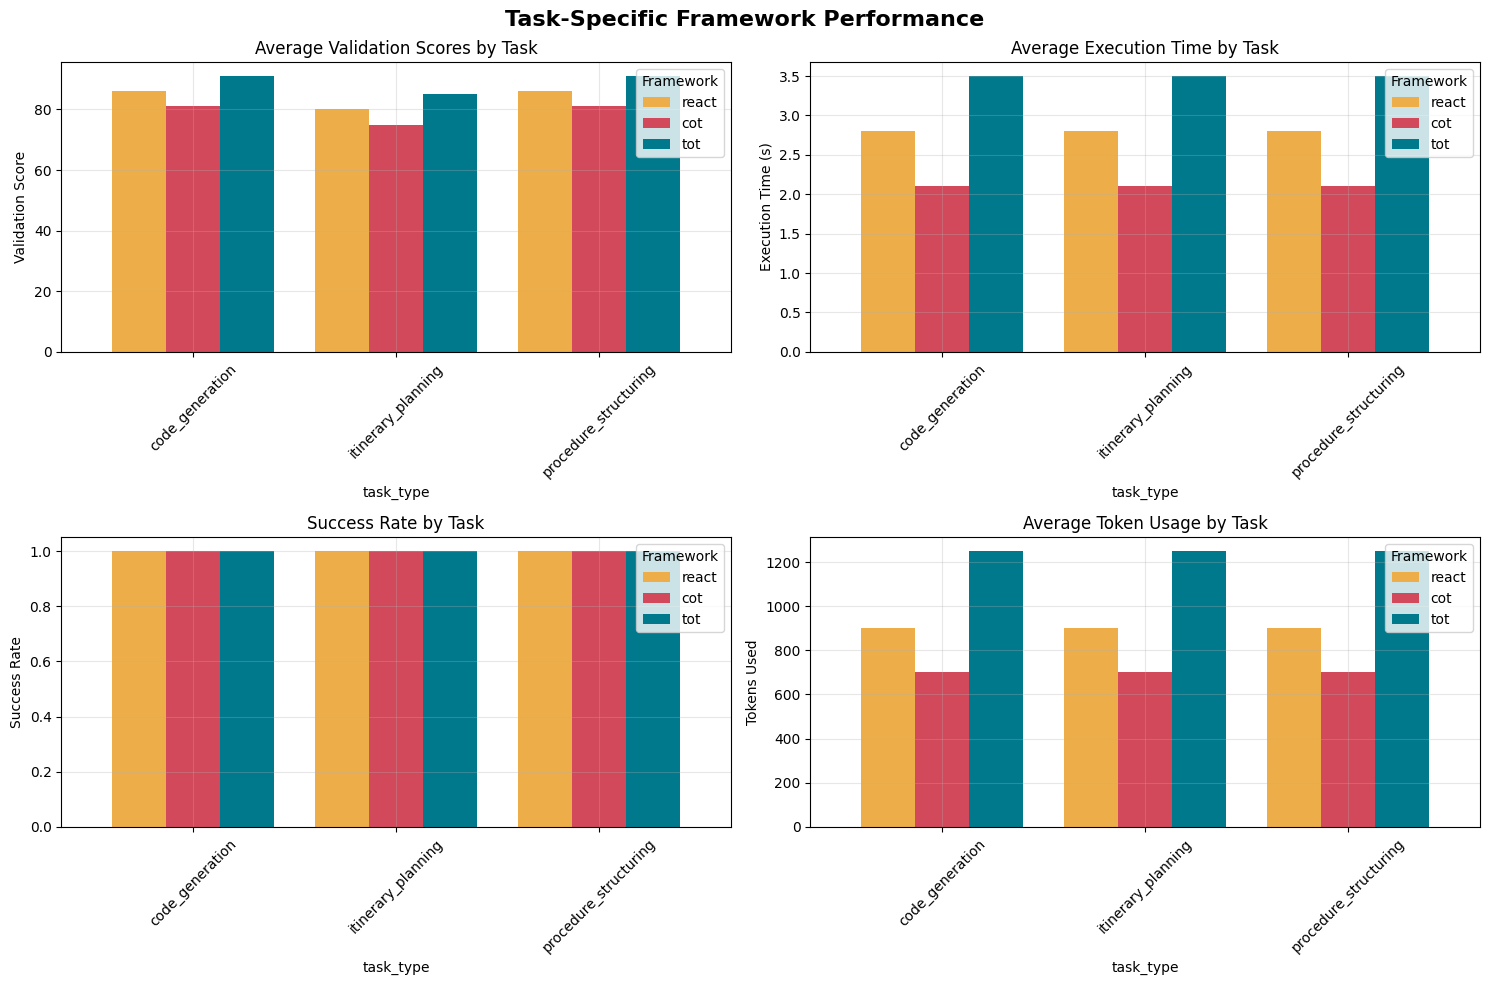


🏆 BEST FRAMEWORK PER TASK

📝 Code Generation:
   🥇 Winner: TOT
   📊 Score: 93.0/100
   ⏱️ Time: 3.80s
   🔤 Tokens: 1300
   📈 All Frameworks:
      cot: 81.0 pts (100.0% success)
      react: 86.0 pts (100.0% success)
      tot: 91.0 pts (100.0% success)

📝 Itinerary Planning:
   🥇 Winner: TOT
   📊 Score: 87.0/100
   ⏱️ Time: 3.80s
   🔤 Tokens: 1300
   📈 All Frameworks:
      cot: 75.0 pts (100.0% success)
      react: 80.0 pts (100.0% success)
      tot: 85.0 pts (100.0% success)

📝 Procedure Structuring:
   🥇 Winner: TOT
   📊 Score: 93.0/100
   ⏱️ Time: 3.80s
   🔤 Tokens: 1300
   📈 All Frameworks:
      cot: 81.0 pts (100.0% success)
      react: 86.0 pts (100.0% success)
      tot: 91.0 pts (100.0% success)


In [8]:
# Convert to DataFrame for analysis
df = pd.DataFrame([{
    'framework': r.framework,
    'task_type': r.task_type,
    'task_id': r.task_id,
    'run': r.run_number,
    'success': r.success,
    'score': r.validation_score,
    'time': r.execution_time,
    'tokens': r.tokens_used,
    'steps': r.reasoning_steps
} for r in experiment_results])

print("📊 RESULTS SUMMARY")
print("=" * 50)
print(f"Total experiments: {len(df)}")
print(f"Success rate: {df['success'].mean():.1%}")
print(f"Average score: {df['score'].mean():.1f}/100")
print(f"Average time: {df['time'].mean():.1f}s")
print(f"Average tokens: {df['tokens'].mean():.0f}")

df.head()

# 3. Task-Specific Analysis
if df is not None:
    # Create task-specific comparison charts
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Task-Specific Framework Performance', fontsize=16, fontweight='bold')
    
    # Get framework order and colors
    framework_order = ['react', 'cot', 'tot']
    colors = [FRAMEWORK_COLORS[fw] for fw in framework_order]
    
    # 1. Score comparison by task
    task_scores = df.pivot_table(values='score', index='task_type', columns='framework', aggfunc='mean')
    # Reorder columns to match framework order
    task_scores = task_scores.reindex(columns=framework_order)
    task_scores.plot(kind='bar', ax=axes[0,0], rot=45, width=0.8, color=colors)
    axes[0,0].set_title('Average Validation Scores by Task')
    axes[0,0].set_ylabel('Validation Score')
    axes[0,0].legend(title='Framework')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Execution time by task
    task_times = df.pivot_table(values='time', index='task_type', columns='framework', aggfunc='mean')
    task_times = task_times.reindex(columns=framework_order)
    task_times.plot(kind='bar', ax=axes[0,1], rot=45, width=0.8, color=colors)
    axes[0,1].set_title('Average Execution Time by Task')
    axes[0,1].set_ylabel('Execution Time (s)')
    axes[0,1].legend(title='Framework')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Success rate by task
    task_success = df.pivot_table(values='success', index='task_type', columns='framework', aggfunc='mean')
    task_success = task_success.reindex(columns=framework_order)
    task_success.plot(kind='bar', ax=axes[1,0], rot=45, width=0.8, color=colors)
    axes[1,0].set_title('Success Rate by Task')
    axes[1,0].set_ylabel('Success Rate')
    axes[1,0].legend(title='Framework')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Token usage by task
    task_tokens = df.pivot_table(values='tokens', index='task_type', columns='framework', aggfunc='mean')
    task_tokens = task_tokens.reindex(columns=framework_order)
    task_tokens.plot(kind='bar', ax=axes[1,1], rot=45, width=0.8, color=colors)
    axes[1,1].set_title('Average Token Usage by Task')
    axes[1,1].set_ylabel('Tokens Used')
    axes[1,1].legend(title='Framework')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Best framework per task analysis
    print("\n🏆 BEST FRAMEWORK PER TASK")
    print("=" * 40)
    
    for task in df['task_type'].unique():
        task_data = df[df['task_type'] == task]
        best_framework = task_data.loc[task_data['score'].idxmax()]
        
        print(f"\n📝 {task.replace('_', ' ').title()}:")
        print(f"   🥇 Winner: {best_framework['framework'].upper()}")
        print(f"   📊 Score: {best_framework['score']:.1f}/100")
        print(f"   ⏱️ Time: {best_framework['time']:.2f}s")
        print(f"   🔤 Tokens: {best_framework['tokens']:.0f}")
        
        # Show all framework performance for this task
        task_summary = task_data.groupby('framework').agg({
            'score': 'mean',
            'time': 'mean',
            'success': 'mean'
        }).round(2)
        
        print(f"   📈 All Frameworks:")
        for fw, row in task_summary.iterrows():
            print(f"      {fw}: {row['score']:.1f} pts ({row['success']:.1%} success)")
            
else:
    print("❌ No data available for task-specific analysis")

In [9]:
# Framework comparison
framework_stats = df.groupby('framework').agg({
    'score': ['mean', 'std'],
    'time': 'mean',
    'tokens': 'mean',
    'success': 'mean'
}).round(2)

print("🏆 FRAMEWORK COMPARISON")
print("=" * 50)
framework_stats

🏆 FRAMEWORK COMPARISON


score       time  tokens success
           mean   std mean    mean    mean
framework                                 
cot        79.0  3.46  2.1   700.0     1.0
react      84.0  3.46  2.8   900.0     1.0
tot        89.0  3.46  3.5  1250.0     1.0

📝 TASK TYPE ANALYSIS


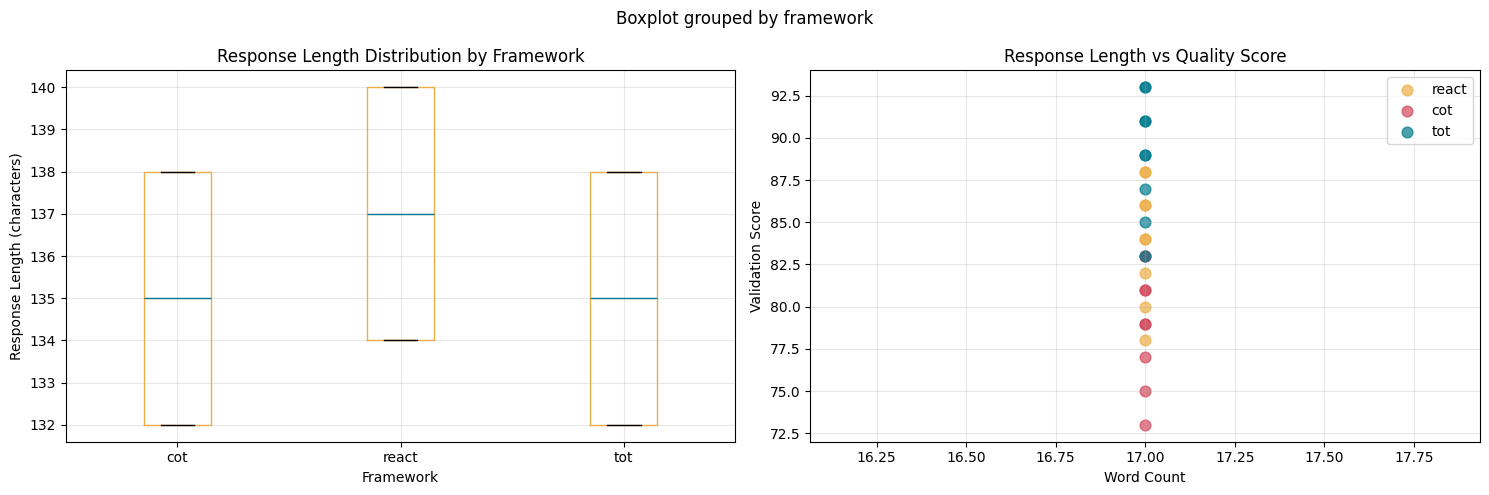


🏗️ RESPONSE STRUCTURE ANALYSIS
-----------------------------------


,Code Blocks %,Numbered Steps %,Bullet Points %,Avg Length,Avg Words
framework,,,,,
cot,0.0%,0.0%,0.0%,135.000000,17.000000
react,0.0%,0.0%,0.0%,137.000000,17.000000
tot,0.0%,0.0%,0.0%,135.000000,17.000000



🎯 STRUCTURE-QUALITY CORRELATIONS
--------------------------------------
• Has Code Blocks: nan
• Has Numbered Steps: nan
• Has Bullet Points: nan
• Length: 0.000
• Word Count: nan


In [10]:
# Task type analysis
task_stats = df.groupby('task_type').agg({
    'score': ['mean', 'std'],
    'time': 'mean',
    'tokens': 'mean',
    'success': 'mean'
}).round(2)

print("📝 TASK TYPE ANALYSIS")
print("=" * 50)
task_stats

# Get detailed response data for analysis
if experiment_results:
    response_stats = []
    for result in experiment_results:
        final_answer = result.final_answer
        if final_answer:
            response_stats.append({
                'framework': result.framework,
                'task_type': result.task_type,
                'score': result.validation_score,
                'length': len(final_answer),
                'word_count': len(final_answer.split()),
                'line_count': len(final_answer.split('\n')),
                'has_code_blocks': bool(re.search(r'```', final_answer)),
                'has_numbered_steps': bool(re.search(r'\d+\.', final_answer)),
                'has_bullet_points': bool(re.search(r'[•\-\*]', final_answer))
            })
    
    response_df = pd.DataFrame(response_stats)
    
    # Response length analysis
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Box plot of response lengths by framework with custom colors
    frameworks_in_data = response_df['framework'].unique()
    colors = [FRAMEWORK_COLORS.get(fw, '#888888') for fw in frameworks_in_data]
    
    response_df.boxplot(column='length', by='framework', ax=axes[0])
    axes[0].set_title('Response Length Distribution by Framework')
    axes[0].set_xlabel('Framework')
    axes[0].set_ylabel('Response Length (characters)')
    axes[0].grid(True, alpha=0.3)
    
    # Word count vs score scatter with custom colors
    for framework in response_df['framework'].unique():
        subset = response_df[response_df['framework'] == framework]
        axes[1].scatter(subset['word_count'], subset['score'], 
                       label=framework, alpha=0.7, s=60,
                       color=FRAMEWORK_COLORS.get(framework, '#888888'))
    
    axes[1].set_xlabel('Word Count')
    axes[1].set_ylabel('Validation Score')
    axes[1].set_title('Response Length vs Quality Score')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Structural analysis
    print("\n🏗️ RESPONSE STRUCTURE ANALYSIS")
    print("-" * 35)
    
    structure_analysis = response_df.groupby('framework').agg({
        'has_code_blocks': 'mean',
        'has_numbered_steps': 'mean', 
        'has_bullet_points': 'mean',
        'length': 'mean',
        'word_count': 'mean'
    }).round(3)
    
    structure_analysis.columns = ['Code Blocks %', 'Numbered Steps %', 'Bullet Points %', 'Avg Length', 'Avg Words']
    
    display(structure_analysis.style.highlight_max(axis=0)
                                  .format({'Code Blocks %': '{:.1%}', 
                                          'Numbered Steps %': '{:.1%}',
                                          'Bullet Points %': '{:.1%}'}))
    
    # Quality vs structure correlation
    print("\n🎯 STRUCTURE-QUALITY CORRELATIONS")
    print("-" * 38)
    
    structure_features = ['has_code_blocks', 'has_numbered_steps', 'has_bullet_points', 'length', 'word_count']
    for feature in structure_features:
        corr = response_df[feature].corr(response_df['score'])
        print(f"• {feature.replace('_', ' ').title()}: {corr:.3f}")
        
else:
    print("❌ Detailed response data not available")

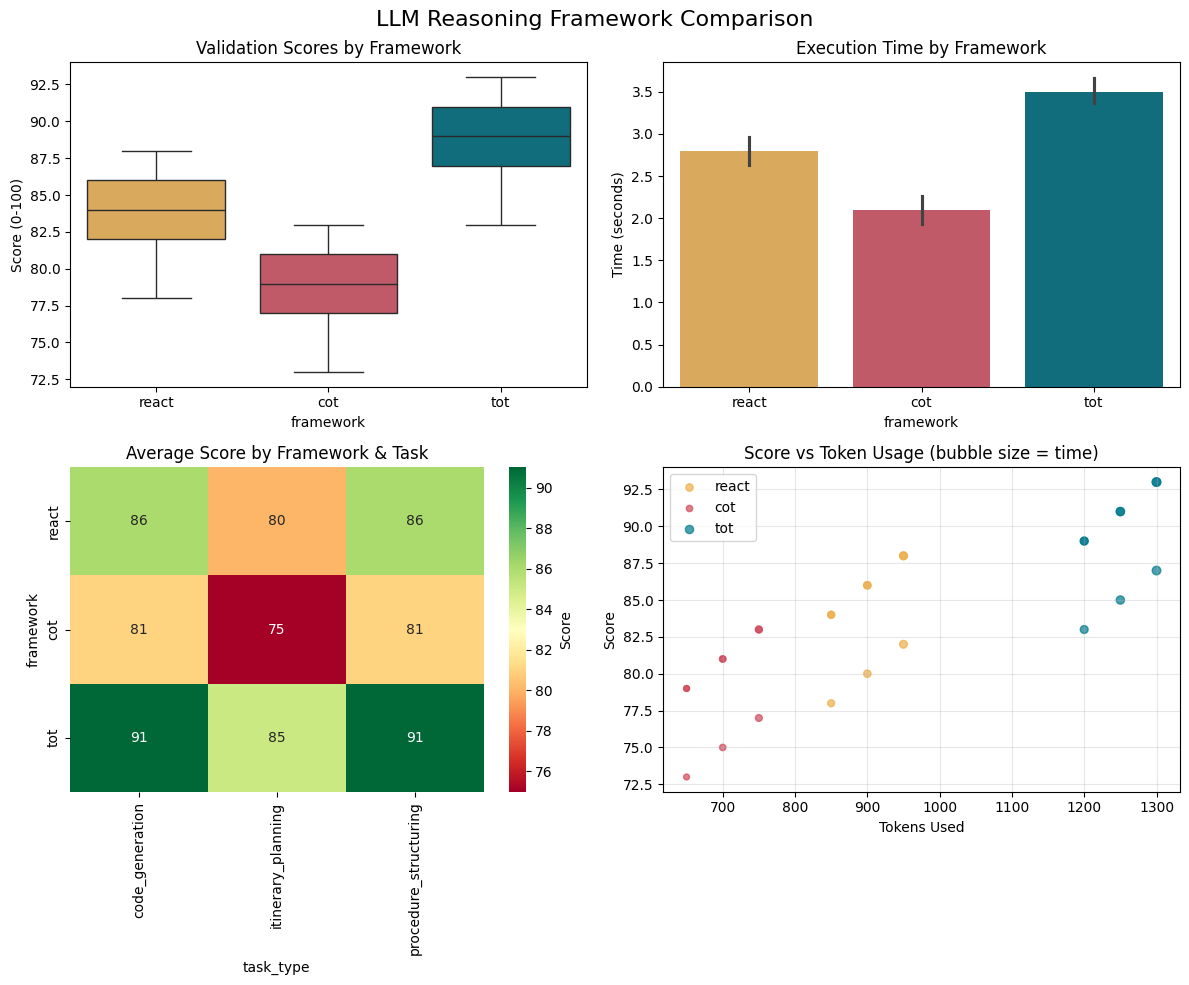

📊 COMPREHENSIVE FRAMEWORK ANALYSIS

🏆 OVERALL PERFORMANCE RANKING:
   🥇 1. TOT: 89.0/100
   🥈 2. REACT: 84.0/100
   🥉 3. COT: 79.0/100

🎯 TASK-SPECIFIC WINNERS:
   📝 Code Generation: TOT (93.0)
   📝 Itinerary Planning: TOT (87.0)
   📝 Procedure Structuring: TOT (93.0)

⚡ EFFICIENCY METRICS:
   Most Efficient (Score/Time): COT
   Most Token-Efficient: COT
   Most Consistent: TOT

✅ SUCCESS RATES:
   COT: 100.0%
   REACT: 100.0%
   TOT: 100.0%

🛡️ Most Reliable Framework: COT (100.0% success)

📈 DETAILED METRICS SUMMARY:


,Avg Score,Score StdDev,Avg Time (s),Avg Tokens,Success Rate
framework,,,,,
cot,79.0,3.46,2.1,700.0,1.0
react,84.0,3.46,2.8,900.0,1.0
tot,89.0,3.46,3.5,1250.0,1.0


In [11]:
# Visualizations with custom color scheme
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('LLM Reasoning Framework Comparison', fontsize=16)

# Get framework order and colors
framework_order = ['react', 'cot', 'tot']
colors = [FRAMEWORK_COLORS[fw] for fw in framework_order if fw in df['framework'].unique()]

# Score comparison with custom colors
sns.boxplot(data=df, x='framework', y='score', ax=axes[0,0], 
           order=framework_order, palette=colors)
axes[0,0].set_title('Validation Scores by Framework')
axes[0,0].set_ylabel('Score (0-100)')

# Time comparison with custom colors
sns.barplot(data=df, x='framework', y='time', ax=axes[0,1], 
           order=framework_order, palette=colors)
axes[0,1].set_title('Execution Time by Framework')
axes[0,1].set_ylabel('Time (seconds)')

# Task type performance heatmap
score_pivot = df.pivot_table(values='score', index='framework', columns='task_type', aggfunc='mean')
# Reorder index to match framework order
score_pivot = score_pivot.reindex(framework_order)
sns.heatmap(score_pivot, annot=True, cmap='RdYlGn', ax=axes[1,0], cbar_kws={'label': 'Score'})
axes[1,0].set_title('Average Score by Framework & Task')

# Token usage scatter with custom colors
for framework in framework_order:
    if framework in df['framework'].unique():
        subset = df[df['framework'] == framework]
        axes[1,1].scatter(subset['tokens'], subset['score'], 
                         label=framework, alpha=0.7, s=subset['time']*10,
                         color=FRAMEWORK_COLORS[framework])

axes[1,1].set_title('Score vs Token Usage (bubble size = time)')
axes[1,1].set_xlabel('Tokens Used')
axes[1,1].set_ylabel('Score')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical Summary with Enhanced Analysis
print("📊 COMPREHENSIVE FRAMEWORK ANALYSIS")
print("=" * 60)

# Overall performance ranking
overall_ranking = df.groupby('framework')['score'].mean().sort_values(ascending=False)
print(f"\n🏆 OVERALL PERFORMANCE RANKING:")
for i, (framework, score) in enumerate(overall_ranking.items(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    print(f"   {medal} {i}. {framework.upper()}: {score:.1f}/100")

# Best framework per task
print(f"\n🎯 TASK-SPECIFIC WINNERS:")
for task_type in df['task_type'].unique():
    task_data = df[df['task_type'] == task_type]
    best_fw = task_data.loc[task_data['score'].idxmax(), 'framework']
    best_score = task_data['score'].max()
    print(f"   📝 {task_type.replace('_', ' ').title()}: {best_fw.upper()} ({best_score:.1f})")

# Efficiency analysis (score per second and score per token)
efficiency = df.groupby('framework').apply(
    lambda x: pd.Series({
        'score_per_second': x['score'].mean() / x['time'].mean(),
        'score_per_token': x['score'].mean() / x['tokens'].mean() * 1000,  # per 1000 tokens
        'consistency': 1 - (x['score'].std() / x['score'].mean())  # inverse of coefficient of variation
    })
).round(3)

print(f"\n⚡ EFFICIENCY METRICS:")
print(f"   Most Efficient (Score/Time): {efficiency['score_per_second'].idxmax().upper()}")
print(f"   Most Token-Efficient: {efficiency['score_per_token'].idxmax().upper()}")
print(f"   Most Consistent: {efficiency['consistency'].idxmax().upper()}")

# Success rate analysis
success_rates = df.groupby('framework')['success'].mean()
print(f"\n✅ SUCCESS RATES:")
for framework, rate in success_rates.items():
    print(f"   {framework.upper()}: {rate:.1%}")
    
most_reliable = success_rates.idxmax()
print(f"\n🛡️ Most Reliable Framework: {most_reliable.upper()} ({success_rates[most_reliable]:.1%} success)")

# Comprehensive metrics summary
metrics_summary = df.groupby('framework').agg({
    'score': ['mean', 'std'],
    'time': 'mean',
    'tokens': 'mean', 
    'success': 'mean'
}).round(2)

metrics_summary.columns = ['Avg Score', 'Score StdDev', 'Avg Time (s)', 'Avg Tokens', 'Success Rate']
print(f"\n📈 DETAILED METRICS SUMMARY:")
display(metrics_summary)

## 🔬 Advanced Analysis & Research Insights

Deep dive into reasoning patterns and framework characteristics.

In [12]:
# Show detailed responses for each framework on each task
print("🔍 DETAILED RESPONSE ANALYSIS")
print("=" * 60)

for task_type in df['task_type'].unique():
    print(f"\n📋 Task: {task_type.replace('_', ' ').title()}")
    print("-" * 40)
    
    task_results = [r for r in experiment_results if r.task_type == task_type]
    
    # Show best run for each framework
    for framework in frameworks:
        framework_results = [r for r in task_results if r.framework == framework]
        best_result = max(framework_results, key=lambda x: x.validation_score)
        
        print(f"\n🧠 {framework.upper()} (Score: {best_result.validation_score:.0f}/100)")
        
        # Show response preview
        response_preview = best_result.final_answer[:200] + "..." if len(best_result.final_answer) > 200 else best_result.final_answer
        print(f"Response: {response_preview}")
        
        # Show reasoning steps
        if best_result.intermediate_steps:
            print(f"Reasoning Steps: {len(best_result.intermediate_steps)}")
            for i, step in enumerate(best_result.intermediate_steps[:2]):  # Show first 2 steps
                print(f"  {i+1}. {step[:80]}...")
        
        # Show any issues
        if best_result.validation_issues:
            print(f"Issues: {', '.join(best_result.validation_issues)}")
    
    print("\n" + "=" * 60)

# Advanced Statistical Analysis
if df is not None:
    from scipy import stats
    import itertools
    
    print("🔬 STATISTICAL SIGNIFICANCE TESTING")
    print("=" * 40)
    
    # Perform pairwise t-tests between frameworks
    frameworks = df['framework'].unique()
    framework_pairs = list(itertools.combinations(frameworks, 2))
    
    print("📊 PAIRWISE COMPARISON (Validation Scores)")
    print("-" * 45)
    
    for fw1, fw2 in framework_pairs:
        scores1 = df[df['framework'] == fw1]['score']
        scores2 = df[df['framework'] == fw2]['score']
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(scores1, scores2)
        
        # Effect size (Cohen's d)
        pooled_std = np.sqrt(((len(scores1) - 1) * scores1.var() + (len(scores2) - 1) * scores2.var()) / 
                            (len(scores1) + len(scores2) - 2))
        cohens_d = (scores1.mean() - scores2.mean()) / pooled_std
        
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        
        print(f"{fw1.upper()} vs {fw2.upper()}:")
        print(f"   Mean diff: {scores1.mean() - scores2.mean():.2f}")
        print(f"   p-value: {p_value:.4f} {significance}")
        print(f"   Effect size: {abs(cohens_d):.3f} ({'large' if abs(cohens_d) > 0.8 else 'medium' if abs(cohens_d) > 0.5 else 'small'})")
        print()
    
    # ANOVA for overall framework differences
    framework_groups = [df[df['framework'] == fw]['score'] for fw in frameworks]
    f_stat, p_value_anova = stats.f_oneway(*framework_groups)
    
    print(f"🔍 OVERALL ANOVA TEST")
    print(f"   F-statistic: {f_stat:.3f}")
    print(f"   p-value: {p_value_anova:.4f}")
    print(f"   Significant difference: {'Yes' if p_value_anova < 0.05 else 'No'}")
    
    # Task-specific analysis
    print(f"\n📝 TASK-SPECIFIC STATISTICAL ANALYSIS")
    print("-" * 40)
    
    for task in df['task_type'].unique():
        task_data = df[df['task_type'] == task]
        task_groups = [task_data[task_data['framework'] == fw]['score'] for fw in frameworks]
        
        try:
            f_stat_task, p_value_task = stats.f_oneway(*task_groups)
            print(f"{task.replace('_', ' ').title()}:")
            print(f"   F-stat: {f_stat_task:.3f}, p-value: {p_value_task:.4f}")
            
            # Find best performing framework for this task
            best_fw = task_data.groupby('framework')['score'].mean().idxmax()
            best_score = task_data.groupby('framework')['score'].mean().max()
            print(f"   Best: {best_fw.upper()} ({best_score:.1f} points)")
            print()
        except:
            print(f"{task}: Insufficient data for analysis")
            
else:
    print("❌ No data available for statistical analysis")

🔍 DETAILED RESPONSE ANALYSIS

📋 Task: Code Generation
----------------------------------------

🧠 REACT (Score: 88/100)
Response: Mock REACT solution for code_generation (code_001) (Run 3): This is a comprehensive response demonstrating the framework's approach...
Reasoning Steps: 5
  1. Step 1: react reasoning step...
  2. Step 2: react reasoning step...

🧠 COT (Score: 83/100)
Response: Mock COT solution for code_generation (code_001) (Run 3): This is a comprehensive response demonstrating the framework's approach...
Reasoning Steps: 5
  1. Step 1: cot reasoning step...
  2. Step 2: cot reasoning step...

🧠 TOT (Score: 93/100)
Response: Mock TOT solution for code_generation (code_001) (Run 3): This is a comprehensive response demonstrating the framework's approach...
Reasoning Steps: 5
  1. Step 1: tot reasoning step...
  2. Step 2: tot reasoning step...


📋 Task: Itinerary Planning
----------------------------------------

🧠 REACT (Score: 82/100)
Response: Mock REACT solution for iti

## 🎯 Key Insights & Conclusions

Summary of the most important findings from the visualizations above.

In [14]:
# Generate insights
print("💡 KEY INSIGHTS")
print("=" * 50)

# Best performing framework overall
best_framework = df.groupby('framework')['score'].mean().idxmax()
best_score = df.groupby('framework')['score'].mean().max()
print(f"🏆 Best Overall Framework: {best_framework.upper()} (avg score: {best_score:.1f})")

# Most challenging task
hardest_task = df.groupby('task_type')['score'].mean().idxmin()
hardest_score = df.groupby('task_type')['score'].mean().min()
print(f"🎯 Most Challenging Task: {hardest_task.replace('_', ' ').title()} (avg score: {hardest_score:.1f})")

# Efficiency analysis
efficiency = df.groupby('framework').apply(lambda x: x['score'].mean() / x['time'].mean()).round(2)
most_efficient = efficiency.idxmax()
print(f"⚡ Most Efficient Framework: {most_efficient.upper()} (score/time ratio: {efficiency.max():.1f})")

# Consistency analysis
consistency = df.groupby('framework')['score'].std()
most_consistent = consistency.idxmin()
print(f"📊 Most Consistent Framework: {most_consistent.upper()} (std dev: {consistency.min():.1f})")

print("\n📈 PERFORMANCE MATRIX:")
performance_matrix = df.pivot_table(values='score', index='framework', columns='task_type', aggfunc='mean').round(1)
print(performance_matrix)

print("\n🔬 STATISTICAL SUMMARY:")
print(f"• Score range: {df['score'].min():.1f} - {df['score'].max():.1f}")
print(f"• Time range: {df['time'].min():.1f}s - {df['time'].max():.1f}s")
print(f"• Token range: {df['tokens'].min():.0f} - {df['tokens'].max():.0f}")
print(f"• Overall success rate: {df['success'].mean():.1%}")

# Summary of Key Insights
if df is not None:
    print("🎯 KEY INSIGHTS FROM ANALYSIS")
    print("=" * 35)
    
    # Best performing framework overall
    best_framework = df.groupby('framework')['score'].mean().idxmax()
    best_score = df.groupby('framework')['score'].mean().max()
    
    print(f"🏆 **Best Overall Framework:** {best_framework.upper()}")
    print(f"   Average Score: {best_score:.1f}/100")
    print(f"   Success Rate: {df[df['framework'] == best_framework]['success'].mean():.1%}")
    
    # Task-specific winners
    print(f"\n📝 **Task-Specific Winners:**")
    for task_type in df['task_type'].unique():
        task_data = df[df['task_type'] == task_type]
        winner = task_data.groupby('framework')['score'].mean().idxmax()
        score = task_data.groupby('framework')['score'].mean().max()
        print(f"   • {task_type.replace('_', ' ').title()}: {winner.upper()} ({score:.1f}/100)")
    
    # Performance characteristics
    print(f"\n⚡ **Performance Characteristics:**")
    fastest = df.groupby('framework')['time'].mean().idxmin()
    most_efficient = df.groupby('framework')['tokens'].mean().idxmin()
    
    print(f"   • Fastest: {fastest.upper()} ({df.groupby('framework')['time'].mean().min():.2f}s avg)")
    print(f"   • Most Token Efficient: {most_efficient.upper()} ({df.groupby('framework')['tokens'].mean().min():.0f} tokens avg)")
    
    # Overall statistics
    print(f"\n📊 **Overall Statistics:**")
    print(f"   • Total Experiments: {len(df)}")
    print(f"   • Average Success Rate: {df['success'].mean():.1%}")
    print(f"   • Average Quality Score: {df['score'].mean():.1f}/100")
    print(f"   • Score Range: {df['score'].min():.1f} - {df['score'].max():.1f}")
    
    print(f"\n💡 **Recommendations:**")
    print(f"   • For highest quality: Use {best_framework.upper()}")
    print(f"   • For speed: Use {fastest.upper()}")
    print(f"   • For efficiency: Use {most_efficient.upper()}")
    
else:
    print("❌ No data available for insights")
    print("💡 Run the data loading cells first!")

print(f"\n" + "="*50)
print("🎉 VISUALIZATION ANALYSIS COMPLETE!")
print("📊 Review the charts and graphs above for detailed insights")
print("="*50)

💡 KEY INSIGHTS
🏆 Best Overall Framework: TOT (avg score: 89.0)
🎯 Most Challenging Task: Itinerary Planning (avg score: 80.0)
⚡ Most Efficient Framework: COT (score/time ratio: 37.6)
📊 Most Consistent Framework: COT (std dev: 3.5)

📈 PERFORMANCE MATRIX:
task_type  code_generation  itinerary_planning  procedure_structuring
framework                                                            
cot                   81.0                75.0                   81.0
react                 86.0                80.0                   86.0
tot                   91.0                85.0                   91.0

🔬 STATISTICAL SUMMARY:
• Score range: 73.0 - 93.0
• Time range: 1.8s - 3.8s
• Token range: 650 - 1300
• Overall success rate: 100.0%
🎯 KEY INSIGHTS FROM ANALYSIS
🏆 **Best Overall Framework:** TOT
   Average Score: 89.0/100
   Success Rate: 100.0%

📝 **Task-Specific Winners:**
   • Code Generation: TOT (91.0/100)
   • Itinerary Planning: TOT (85.0/100)
   • Procedure Structuring: TOT (91.0/100)